# Machine Learning

Import Libraries and read the csv file into a DataFrame, then show the DataFrame.

In [248]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler, normalize
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, f1_score
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import os
from collections import Counter
%matplotlib inline
import warnings

In [249]:
warnings.filterwarnings('ignore')

In [211]:
df = pd.read_csv('updateTable.csv') #load data
df

,Unnamed: 0,SeriesName,Creator,Genre,YearOfPublished,ChapterLengthInMiniutes,TopCast,star_Num1,star_Num2,star_Num3,star_Num4,star_Num5,UserReviews,CriticReviews,Views,Rating,SeriesId,Rating_range,ChapterLength_range,YearOfPublished_range
0,0,Peacemaker,James Gunn,Action,2022,40.0,"['John Cena', 'Danielle Brooks', 'Freddie Stro...",'John Cena','Danielle Brooks','Freddie Stroma','Chukwudi Iwuji','Jennifer Holland',335,21,22000.0,8.4,13146488,8,2.0,NaN
1,1,Encanto,Jared Bush,Animation,2021,102.0,"['Stephanie Beatriz', 'Mar?a Cecilia Botero', ...",'Stephanie Beatriz','Mar?a Cecilia Botero','John Leguizamo','Mauro Castillo','Jessica Darrow',827,192,113000.0,7.3,2953050,7,4.0,NaN
2,2,After Life,Ricky Gervais,Comedy,2019,30.0,"['Ricky Gervais', 'Tom Basden', 'Tony Way', 'D...",'Ricky Gervais','Tom Basden','Tony Way','Diane Morgan','Kerry Godliman',2000,70,112000.0,8.5,8398600,8,1.0,8.0
3,4,Cobra Kai,Josh Heald,Action,2018,30.0,"['Ralph Macchio', 'William Zabka', 'Xolo Marid...",'Ralph Macchio','William Zabka','Xolo Maridue?a','Courtney Henggeler','Tanner Buchanan',2200,152,155000.0,8.6,7221388,8,1.0,8.0
4,5,NaN,Derek Drymon,Animation,2022,87.0,"['Andy Samberg', 'Selena Gomez', 'Kathryn Hahn...",'Andy Samberg','Selena Gomez','Kathryn Hahn','Jim Gaffigan','Steve Buscemi',159,53,14000.0,6.1,9848626,6,3.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5261,5862,NaN,Andrzej Bartkowiak,Action,2009,96.0,"['Kristin Kreuk', 'Neal McDonough', 'Michael C...",'Kristin Kreuk','Neal McDonough','Michael Clarke Duncan','Chris Klein','Robin Shou',201,96,24000.0,3.7,891592,3,4.0,7.0
5262,5863,Stan Helsing,Bo Zenga,Comedy,2009,108.0,"['Steve Howey', 'Diora Baird', 'Kenan Thompson...",'Steve Howey','Diora Baird','Kenan Thompson','Desi Lydic','Leslie Nielsen',94,48,13000.0,3.6,1185266,3,4.0,7.0
5263,5864,Fifty Shades Darker,James Foley,Drama,2017,118.0,"['Dakota Johnson', 'Jamie Dornan', 'Eric Johns...",'Dakota Johnson','Jamie Dornan','Eric Johnson','Eloise Mumford','Bella Heathcote',325,246,99000.0,4.6,4465564,4,4.0,8.0
5264,5865,Grease 2,Patricia Birch,Comedy,1982,115.0,"['Michelle Pfeiffer', 'Maxwell Caulfield', 'Lo...",'Michelle Pfeiffer','Maxwell Caulfield','Lorna Luft','Maureen Teefy','Alison Price',338,32,35000.0,4.4,84021,4,4.0,5.0


In [213]:
df=df.drop(columns=["Unnamed: 0",'Rating_range','YearOfPublished_range','ChapterLength_range','SeriesId'])

In [214]:
target_column = 'Rating' #we want to predict the rating of series

adding analyzed data to out DataFrame in order to improve the prediction

In [215]:
df['Creator movie amount'] = df.groupby('Creator')['Creator'].transform('count')
df['star1 movie amount'] = df.groupby('star_Num1')['star_Num1'].transform('count')
df['star2 movie amount'] = df.groupby('star_Num2')['star_Num2'].transform('count')
df['star3 movie amount'] = df.groupby('star_Num3')['star_Num3'].transform('count')
df['star4 movie amount'] = df.groupby('star_Num4')['star_Num4'].transform('count')
df['star5 movie amount'] = df.groupby('star_Num5')['star_Num5'].transform('count')

df['average rating genre'] = round(df.groupby('Genre')['Rating'].transform('mean'),10)
df['Creator rating avg'] = round(df.groupby('Creator')['Rating'].transform('mean'),1)
df['star1 rating avg'] = round(df.groupby('star_Num1')['Rating'].transform('mean'),5)
df['star2 rating avg'] = round(df.groupby('star_Num2')['Rating'].transform('mean'),5)
df['star3 rating avg'] = round(df.groupby('star_Num3')['Rating'].transform('mean'),5)
df['star4 rating avg'] = round(df.groupby('star_Num4')['Rating'].transform('mean'),5)
df['star5 rating avg'] = round(df.groupby('star_Num5')['Rating'].transform('mean'),5)


df['Action'] = df[df['Genre']=='Action'].groupby('Creator')['Creator'].transform('count')
df['Drama'] = df[df['Genre']=='Drama'].groupby('Creator')['Creator'].transform('count')
df['Comedy'] = df[df['Genre']=='Comedy'].groupby('Creator')['Creator'].transform('count')

df['Comedy'] = df['Comedy'].fillna(0)
df['Action'] = df['Action'].fillna(0)
df['Drama'] = df['Drama'].fillna(0)
df['average rating genre'] = df['average rating genre'].fillna(0)
df['Creator rating avg'] = df['Creator rating avg'].fillna(0)
df['star1 rating avg'] = df['star1 rating avg'].fillna(0)
df['star2 rating avg'] = df['star2 rating avg'].fillna(0)
df['star3 rating avg'] =df['star3 rating avg'].fillna(0)
df['star4 rating avg'] =df['star4 rating avg'].fillna(0)
df['star5 rating avg'] =df['star5 rating avg'].fillna(0)
df['Creator movie amount'] =df['Creator movie amount'].fillna(0)
df['star1 movie amount'] =df['star1 movie amount'].fillna(0)
df['star2 movie amount'] = df['star2 movie amount'].fillna(0)
df['star3 movie amount'] = df['star3 movie amount'].fillna(0)
df['star4 movie amount'] = df['star4 movie amount'].fillna(0)
df['star5 movie amount'] = df['star5 movie amount'].fillna(0)

df.head(10)



,SeriesName,Creator,Genre,YearOfPublished,ChapterLengthInMiniutes,TopCast,star_Num1,star_Num2,star_Num3,star_Num4,...,average rating genre,Creator rating avg,star1 rating avg,star2 rating avg,star3 rating avg,star4 rating avg,star5 rating avg,Action,Drama,Comedy
0,Peacemaker,James Gunn,Action,2022,40.0,"['John Cena', 'Danielle Brooks', 'Freddie Stro...",'John Cena','Danielle Brooks','Freddie Stroma','Chukwudi Iwuji',...,6.362954,7.9,7.54000,8.35000,8.40000,8.4,8.40000,10.0,0.0,0.0
1,Encanto,Jared Bush,Animation,2021,102.0,"['Stephanie Beatriz', 'Mar?a Cecilia Botero', ...",'Stephanie Beatriz','Mar?a Cecilia Botero','John Leguizamo','Mauro Castillo',...,7.144404,7.3,7.30000,7.30000,6.56667,7.3,7.30000,0.0,0.0,0.0
2,After Life,Ricky Gervais,Comedy,2019,30.0,"['Ricky Gervais', 'Tom Basden', 'Tony Way', 'D...",'Ricky Gervais','Tom Basden','Tony Way','Diane Morgan',...,6.724376,8.0,7.73333,8.50000,8.50000,8.5,8.50000,0.0,0.0,5.0
3,Cobra Kai,Josh Heald,Action,2018,30.0,"['Ralph Macchio', 'William Zabka', 'Xolo Marid...",'Ralph Macchio','William Zabka','Xolo Maridue?a','Courtney Henggeler',...,6.362954,8.6,7.07500,8.60000,8.60000,8.6,8.60000,1.0,0.0,0.0
4,NaN,Derek Drymon,Animation,2022,87.0,"['Andy Samberg', 'Selena Gomez', 'Kathryn Hahn...",'Andy Samberg','Selena Gomez','Kathryn Hahn','Jim Gaffigan',...,7.144404,6.1,7.03333,5.83333,7.05000,6.1,6.18889,0.0,0.0,0.0
5,Sing 2,Garth Jennings,Animation,2021,110.0,"['Matthew McConaughey', 'Reese Witherspoon', '...",'Matthew McConaughey','Reese Witherspoon','Scarlett Johansson','Tori Kelly',...,7.144404,7.3,6.77143,7.38889,6.95000,7.6,7.60000,0.0,0.0,0.0
6,NaN,Danny McBride,Comedy,2019,36.0,"['John Goodman', 'Danny McBride', 'Adam Devine...",'John Goodman','Danny McBride','Adam Devine','Cassidy Freeman',...,6.724376,8.1,6.61429,7.38000,7.17500,8.2,6.16667,0.0,0.0,2.0
7,NaN,Jason Reitman,Adventure,2021,4.0,"['Carrie Coon', 'Paul Rudd', 'Finn Wolfhard', ...",'Carrie Coon','Paul Rudd','Finn Wolfhard','Mckenna Grace',...,6.498125,7.3,7.30000,6.30000,7.30000,7.3,7.30000,0.0,0.0,0.0
8,Licorice Pizza,Paul Thomas Anderson,Comedy,2021,13.0,"['Alana Haim', 'Cooper Hoffman', 'Sean Penn', ...",'Alana Haim','Cooper Hoffman','Sean Penn','Tom Waits',...,6.724376,7.5,7.90000,7.90000,7.90000,7.9,7.90000,0.0,0.0,4.0
9,Ted Lasso,Brendan Hunt,Comedy,2020,30.0,"['Jason Sudeikis', 'Brett Goldstein', 'Brendan...",'Jason Sudeikis','Brett Goldstein','Brendan Hunt','Nick Mohammed',...,6.724376,8.8,6.86000,8.80000,8.80000,8.8,8.80000,0.0,0.0,1.0


We take only the numeric columns

In [216]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df_to_ml = df.select_dtypes(include=numerics).copy()
df_to_ml = df_to_ml.reset_index(drop=True).copy()


df.to_csv('to_ml.csv')

df_to_ml

,YearOfPublished,ChapterLengthInMiniutes,UserReviews,CriticReviews,Views,Rating,Creator movie amount,star1 movie amount,star2 movie amount,star3 movie amount,...,average rating genre,Creator rating avg,star1 rating avg,star2 rating avg,star3 rating avg,star4 rating avg,star5 rating avg,Action,Drama,Comedy
0,2022,40.0,335,21,22000.0,8.4,11,10,8.0,7.0,...,6.362954,7.9,7.54000,8.35000,8.40000,8.40,8.40000,10.0,0.0,0.0
1,2021,102.0,827,192,113000.0,7.3,4,4,4.0,9.0,...,7.144404,7.3,7.30000,7.30000,6.56667,7.30,7.30000,0.0,0.0,0.0
2,2019,30.0,2000,70,112000.0,8.5,6,6,1.0,1.0,...,6.724376,8.0,7.73333,8.50000,8.50000,8.50,8.50000,0.0,0.0,5.0
3,2018,30.0,2200,152,155000.0,8.6,1,4,1.0,1.0,...,6.362954,8.6,7.07500,8.60000,8.60000,8.60,8.60000,1.0,0.0,0.0
4,2022,87.0,159,53,14000.0,6.1,2,6,3.0,4.0,...,7.144404,6.1,7.03333,5.83333,7.05000,6.10,6.18889,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5261,2009,96.0,201,96,24000.0,3.7,2,2,2.0,2.0,...,6.362954,4.4,5.40000,5.60000,4.60000,4.95,3.70000,2.0,0.0,0.0
5262,2009,108.0,94,48,13000.0,3.6,1,1,1.0,1.0,...,6.724376,3.6,3.60000,3.60000,3.60000,3.60,3.60000,0.0,0.0,1.0
5263,2017,118.0,325,246,99000.0,4.6,7,6,7.0,4.0,...,6.871653,5.4,4.75000,5.24286,4.57500,4.48,4.60000,0.0,5.0,0.0
5264,1982,115.0,338,32,35000.0,4.4,2,2,2.0,2.0,...,6.724376,4.4,4.40000,4.40000,4.40000,4.40,4.40000,0.0,0.0,2.0


# Linear Regression

There are some functions of training and prediction of the mode 

In [217]:
def target(df, target_column):
    columnsWithoutTarget = df.columns[df.columns != target_column]
    targetCol = target_column

    X = df[columnsWithoutTarget]
    y = df[targetCol]
    return X,y

In [218]:
def train(X,y,test_ratio, rand_state):

    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = test_ratio,random_state= rand_state)
                       
    return x_train, x_test, y_train, y_test

In [219]:
def train_regression_model(X_train, y_train):
    
    trained_model = LinearRegression().fit(X_train, y_train)  
    return trained_model

In [220]:
def predict_regression(trained_model, X_test):
    
    predicted_vals = trained_model.predict(X_test)
    
    return predicted_vals

In [221]:
def evaluate_performance(y_test,y_predicted):
    
    evaluate_value = r2_score(y_test,y_predicted)
                            
    return evaluate_value  

function that check rating of each star in the series

In [222]:
def check_star_rating(df, name):
    if df[df.star_Num1 == name]['star1 rating avg'].empty:
        if df[df.star_Num2 == name]['star2 rating avg'].empty:
            if df[df.star_Num3 == name]['star3 rating avg'].empty:
                if df[df.star_Num4 == name]['star4 rating avg'].empty:
                    if df[df.star_Num5 == name]['star5 rating avg'].empty:
                        return 7
                    else:
                        return df[df.star_Num5 == name]['star5 rating avg'].iloc[0]
                else:
                     return df[df.star_Num4 == name]['star4 rating avg'].iloc[0]
            else:
                return df[df.star_Num3 == name]['star3 rating avg'].iloc[0]
        else:
            return df[df.star_Num2 == name]['star2 rating avg'].iloc[0] 
 
    else:
        return df[df.star_Num1 == name]['star1 rating avg'].iloc[0]

function that predict series Rating by user input

In [223]:
def Details_of_Series_for_inspection(model,df):   
    print('Enter your Creator:')
    creator = input()
    print('Enter Genre:')
    genre = input()
    print('Enter year of published')
    year = input()
    print('Enter chapter length in minutes:')
    chapterLength = input()
    print('Enter your User Reviews:')
    userReviews = input()
    print('Enter your Critic Reviews:')
    criticReviews = input()
    print('Enter your Views:')
    views = input()
    #print('Enter your series Id:')
    #idseries = input()
    print('Enter your 5 main Starts:')
    star1 = input()
    star2 = input()
    star3 = input()
    star4 = input()
    star5 = input() 
    #stars = [star1,star2,star3,star4,star5]
    creator_Series_amount = df[df.Creator == creator].shape[0]
    star1_Series_amount =  df[df.star_Num1 == star1].shape[0]
    star2_Series_amount =  df[df.star_Num2 == star2].shape[0]
    star3_Series_amount =  df[df.star_Num3 == star3].shape[0]
    star4_Series_amount =  df[df.star_Num4 == star4].shape[0]
    star5_Series_amount =  df[df.star_Num5 == star5].shape[0]
    average_rating_genre =  df[df.Genre == genre]['average rating genre'].iloc[0]

    creator_rating_avg  =  df[df.Creator == creator]['Creator rating avg'].iloc[0] 

    star1_rating_avg  = check_star_rating(df, star1) 
    star2_rating_avg  = check_star_rating(df, star2)  
    star3_rating_avg  = check_star_rating(df, star3)
    star4_rating_avg  = check_star_rating(df, star4)
    star5_rating_avg  = check_star_rating(df, star5)

    #writer1_rating_avg = df[df.writer_1 == writer]['writer1 rating avg'].iloc[0]   

    action =  df[df.Creator == creator]['Action'].iloc[0]
    drama  =  df[df.Creator == creator]['Drama'].iloc[0]         
    comedy = df[df.Creator == creator]['Comedy'].iloc[0]
    print('predict : {:.1f}'.format(model.predict([[year,chapterLength,userReviews,criticReviews,views
                                                    ,creator_Series_amount ,star1_Series_amount , star2_Series_amount
                                                    ,star3_Series_amount ,star4_Series_amount ,star5_Series_amount,average_rating_genre
                                                    ,creator_rating_avg ,star1_rating_avg ,star2_rating_avg
                                                    , star3_rating_avg,star4_rating_avg,star5_rating_avg,action
                                                   ,drama,comedy]])[0]))
    #dfSeries = pd.DataFrame({"Creator":creator,"Genre":genre,"series Year of published":year,"chapter length in minutes":chapterLength,"User Views":userViews,"Critic Views":criticViews,"Views":views,"star1":star1,"star2":star2,"star3":star3,"star4":star4,"star5":star5},index=[0])  
    #dfSeries = replace_to_numeric(dfSeries)     
    #predicted_vals = predict_regression(model,dfSeries)  
    #print("with those parameters your Tv Show rating is : ",predicted_vals[0])

In [247]:
X,y = target(df_to_ml,target_column)
x_train, x_test, y_train, y_test = train(X,y,0.2,20)
model_df = train_regression_model(x_train,y_train)
predicted_vals = predict_regression(model_df,x_test)
evaluate = evaluate_performance(y_test,predicted_vals)
print(evaluate)

0.9154058540391881


### Improving The Model

In [235]:
X,y = target(df_to_ml,target_column)
x_train, x_test, y_train, y_test = train(X,y,0.2,60)
model_df = train_regression_model(x_train,y_train)
predicted_vals = predict_regression(model_df,x_test)
evaluate = evaluate_performance(y_test,predicted_vals)

evaluate = 0.9275789769320663


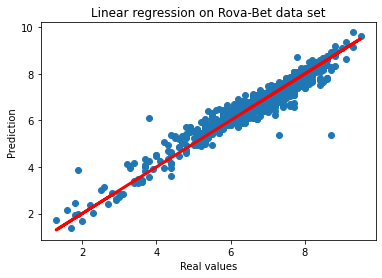

In [236]:
print("evaluate =",evaluate)
plt.scatter(y_test, predicted_vals)
plt.plot(y_test, y_test, color='red', linewidth=3)
plt.title('Linear regression on Rova-Bet data set')
plt.xlabel('Real values')
plt.ylabel('Prediction')
plt.show()

In [237]:
newDf = pd.DataFrame({'rating actual': y_test,'rating predicted':model_df.predict(x_test)})

In [238]:
newDf

,rating actual,rating predicted
286,6.4,6.455209
326,7.0,6.803471
4579,6.0,6.154994
2543,5.0,5.555212
4747,6.2,6.317447
...,...,...
3683,6.4,6.618420
946,8.3,8.349556
3302,5.7,5.451152
1246,6.1,5.919667


R-squared is a statistical measure that represents the goodness of fit of a regression model.

The ideal value for r-square is 1. The closer the value of r-square to 1, the better is the model fitted

In [239]:
newDf.to_csv('predicted.csv')

newDf['rating predicted'] = round(newDf['rating predicted'],1)

print(r2_score(y_test, newDf['rating predicted']))

newDf = newDf[newDf['rating actual'] != round(newDf['rating predicted'],1)]


0.9278053325362373


In [240]:
newDf

,rating actual,rating predicted
286,6.4,6.5
326,7.0,6.8
4579,6.0,6.2
2543,5.0,5.6
4747,6.2,6.3
...,...,...
1898,7.5,7.1
3683,6.4,6.6
3302,5.7,5.5
1246,6.1,5.9


In [250]:
Details_of_Series_for_inspection(model_df,df)

Enter your Creator:
Ricky Gervais
Enter Genre:
Comedy
Enter year of published
2019
Enter chapter length in minutes:
30
Enter your User Reviews:
2000
Enter your Critic Reviews:
70
Enter your Views:
112000
Enter your 5 main Starts:
'Ricky Gervais'
'Tom Basden'
'Tony Way'
'Diane Morgan'
'Kerry Godliman'
predict : 7.6


In [251]:
Details_of_Series_for_inspection(model_df,df)

Enter your Creator:
Benjamin Louis
Enter Genre:
Horror
Enter year of published
2020
Enter chapter length in minutes:
91
Enter your User Reviews:
2
Enter your Critic Reviews:
9
Enter your Views:
289
Enter your 5 main Starts:
'Tony Todd'
'Steffani Brass'
'David Gridley'
'Vince Hill-Bedford'
'William Lee Scott'
predict : 5.2


End Of ML